In [1]:
!pip install plotly

In [2]:
!pip install chart_studio

In [3]:
!pip install feature_engine

In [4]:
!pip install wikipedia

In [139]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [141]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [142]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [125]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [143]:
df=pd.read_csv('https://raw.githubusercontent.com/ktcgopa/CSV-FILE/main/avocado.csv')

In [144]:
#Exploratory Data Analysis
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [145]:
#Here is the shape of our datset
df.shape

(18249, 14)

In [146]:
#Here is our dataset contain 9 float,1 integer ,3 object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [147]:
#In this method we are able to see the numerical columns
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [148]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [149]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [150]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [151]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5926,45,2017-02-19,1.68,109808.80,1360.81,62449.93,33.22,45964.84,44232.00,1732.84,0.0,conventional,2017,BuffaloRochester
6621,51,2017-01-08,0.57,1417208.02,933181.79,198434.84,2690.98,282900.41,190479.48,92420.93,0.0,conventional,2017,Houston
13036,11,2016-10-09,2.09,5771.20,1016.77,2518.91,0.00,2235.52,2219.25,16.27,0.0,organic,2016,LasVegas
17011,44,2017-02-26,2.52,18753.79,6707.73,8785.72,0.00,3260.34,3260.34,0.00,0.0,organic,2017,SanFrancisco
6946,5,2017-11-26,1.33,2200251.00,488106.00,903101.00,15350.00,793694.00,663097.00,128990.00,1607.0,conventional,2017,Midsouth


In [152]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

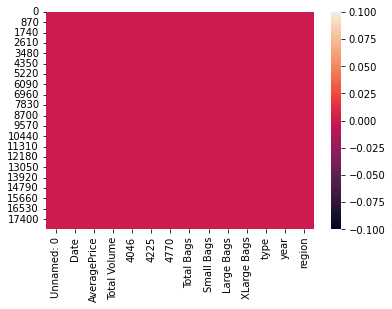

In [153]:
sns.heatmap(df.isnull())

In [154]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [155]:
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

<AxesSubplot:>

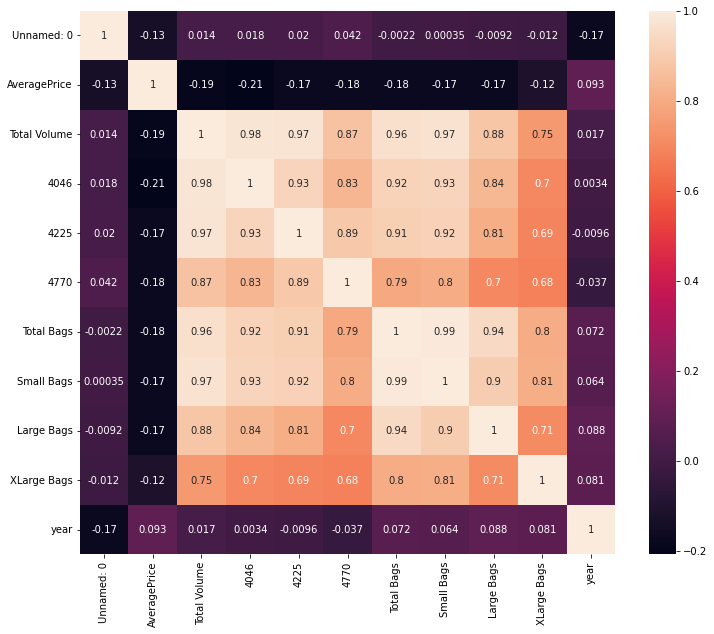

In [156]:
fig_this_size(12,10)
sns.heatmap(df.corr(),annot=True)

In [157]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


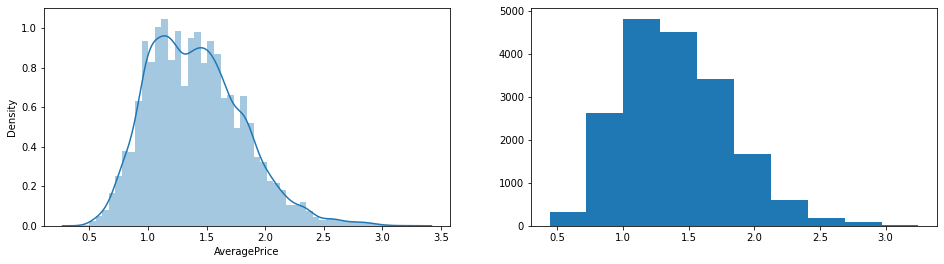

In [158]:
fig=fig_this_size(16,4)
fig.add_subplot(121)
sns.distplot(df.AveragePrice)
fig.add_subplot(122)
plt.hist(df.AveragePrice);

In [159]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [160]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [161]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [162]:
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df.drop(columns=['Date','year'],inplace=True)

In [163]:
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


<bound method IndexOpsMixin.value_counts of 0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object>


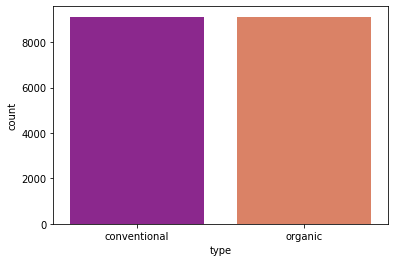

In [164]:
print(df['type'].value_counts)
sns.countplot(x='type',data=df,palette="plasma")
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


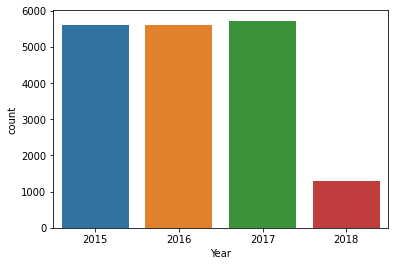

In [165]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df)
plt.show()

01    1944
03    1836
02    1728
10    1512
07    1512
05    1512
11    1404
08    1404
04    1404
12    1403
09    1296
06    1294
Name: Month, dtype: int64


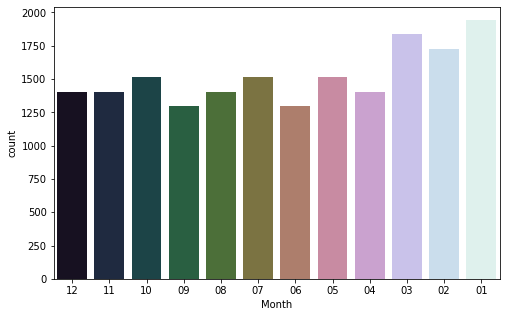

In [166]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month',data=df,palette="cubehelix")
plt.show()

In [3]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date',data=df,palette="turbo")
plt.show()

NameError: name 'df' is not defined

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

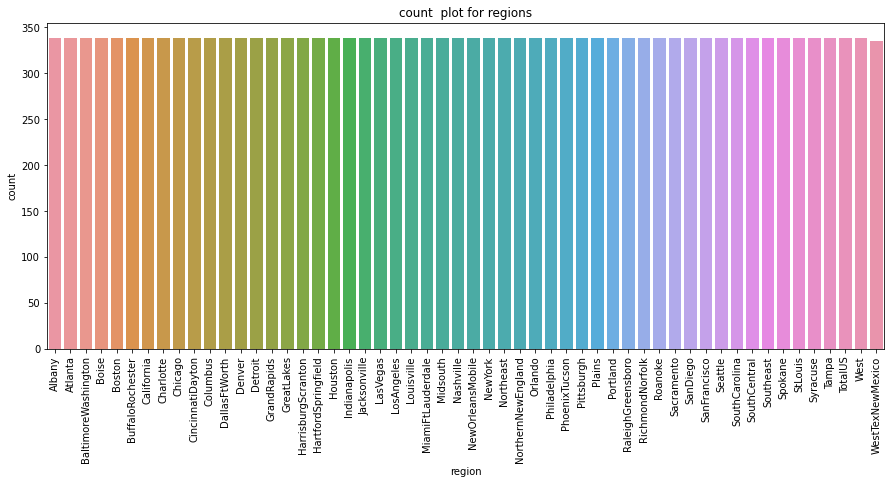

In [168]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x='region',data=df)
plt.title(f'count  plot for regions')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x720 with 0 Axes>

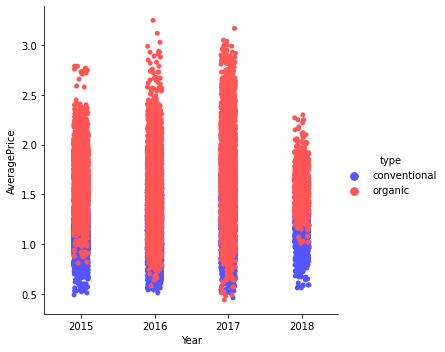

In [169]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year",y='AveragePrice',hue="type",data=df,palette="seismic")
plt.show()

<Figure size 1080x720 with 0 Axes>

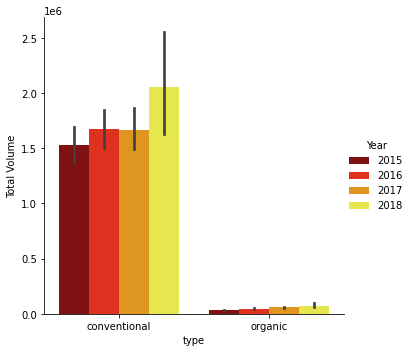

In [170]:
plt.figure(figsize=(15,10))
sns.catplot(x="type",y='Total Volume',hue="Year",kind="bar",data=df,palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

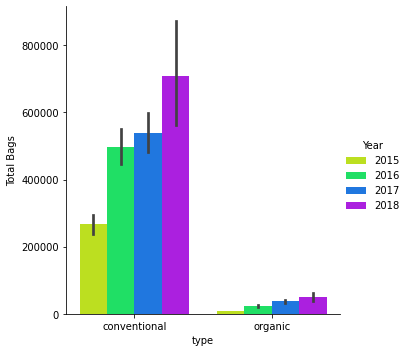

In [171]:
plt.figure(figsize=(15,10))
sns.catplot(x="type",y='Total Bags',hue="Year",kind="bar",data=df,palette="hsv")
plt.show()

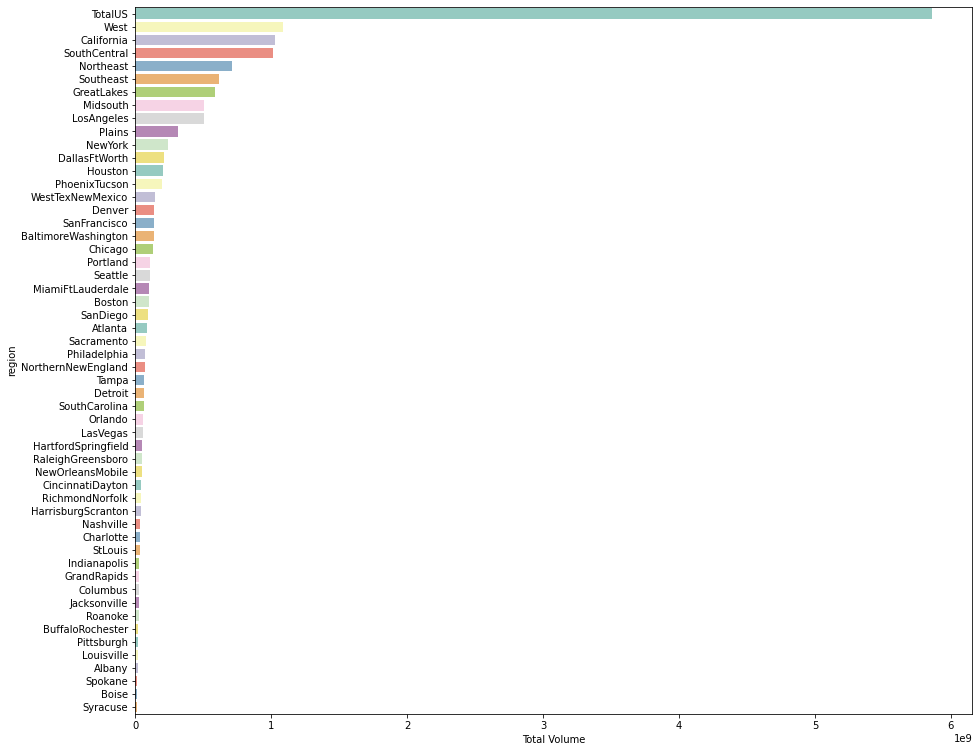

In [172]:
region=df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"],y=region["region"],data=df,palette="Set3")
plt.show()

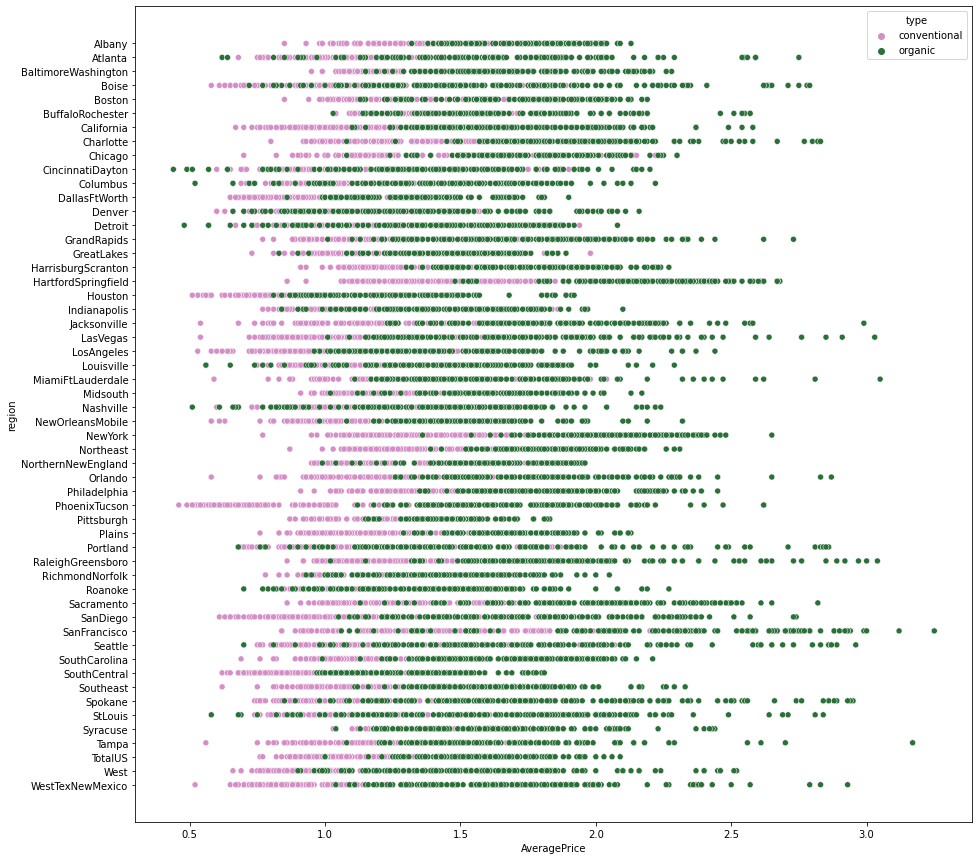

In [173]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="AveragePrice",y='region',hue="type", data=df, palette="cubehelix_r")
plt.show()
            

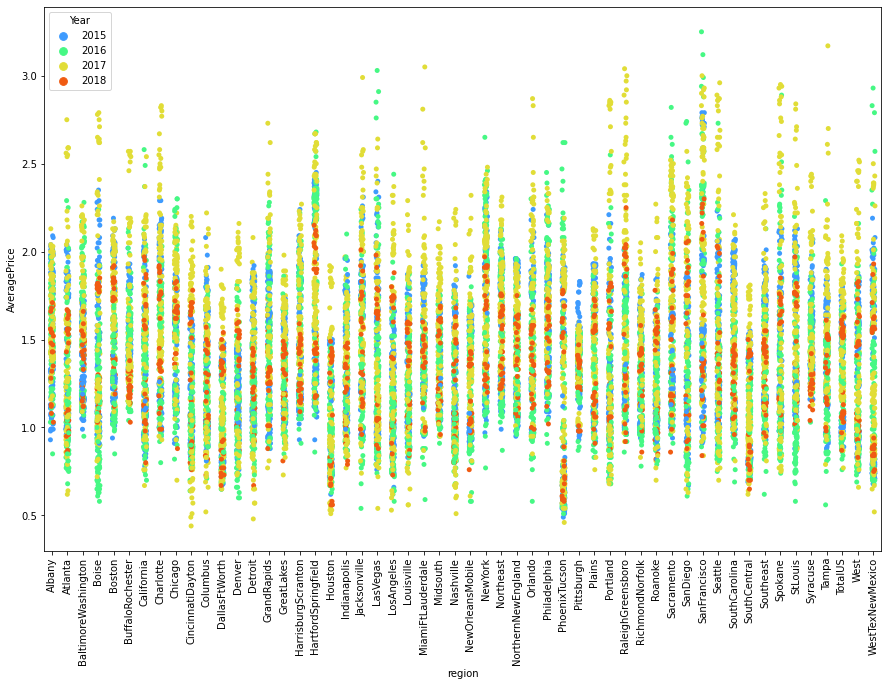

In [174]:
plt.figure(figsize=(15,10))
sns.stripplot(x="region",y='AveragePrice',hue="Year",data=df,palette="turbo")
plt.xticks(rotation=90)
plt.show()

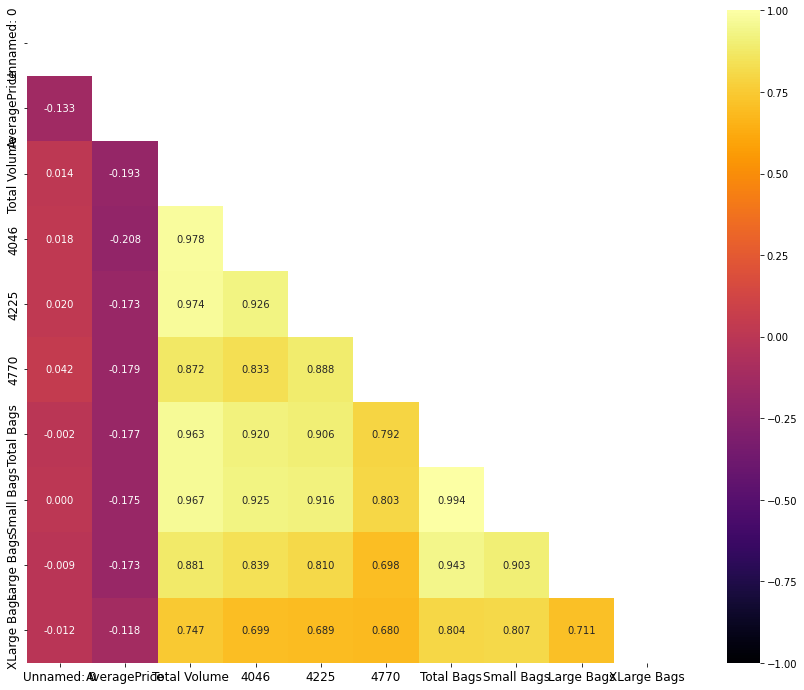

In [175]:
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,square=True,fmt='0.3f',
           annot_kws={'size':10},cmap="inferno",mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [176]:
df.drop(["4046","4225","4770","Small Bags","Large Bags","XLarge Bags"],axis=1,inplace=True)

In [177]:
oe = OrdinalEncoder()
df['region'] = oe.fit_transform(df['region'].values.reshape(-1,1))
df['type'] = oe.fit_transform(df['type'].values.reshape(-1,1))
df

,Unnamed: 0,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,3,1.08,78992.15,5811.16,0.0,0.0,2015,12,06
4,4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,13498.67,1.0,53.0,2018,02,04
18245,8,1.71,13888.04,9264.84,1.0,53.0,2018,01,28
18246,9,1.87,13766.76,9394.11,1.0,53.0,2018,01,21
18247,10,1.93,16205.22,10969.54,1.0,53.0,2018,01,14


TypeError: Vertical orientation requires numeric `y` variable.

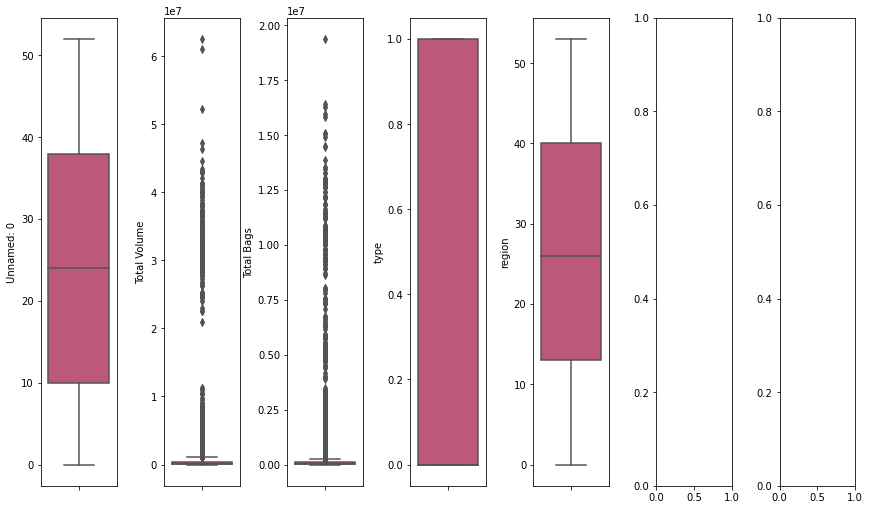

In [178]:
fig,ax=plt.subplots(ncols=7,nrows=1,figsize=(12,7))
index=0
features=df.drop("AveragePrice",axis=1)
ax=ax.flatten()
for col,value in features.items():
    sns.boxplot(y=col,data=df,ax=ax[index],palette="plasma")
    index+=1
    plt.tight_layout(pad=0.4,w_pad=0.4,h_pad=1.0)
plt.show()

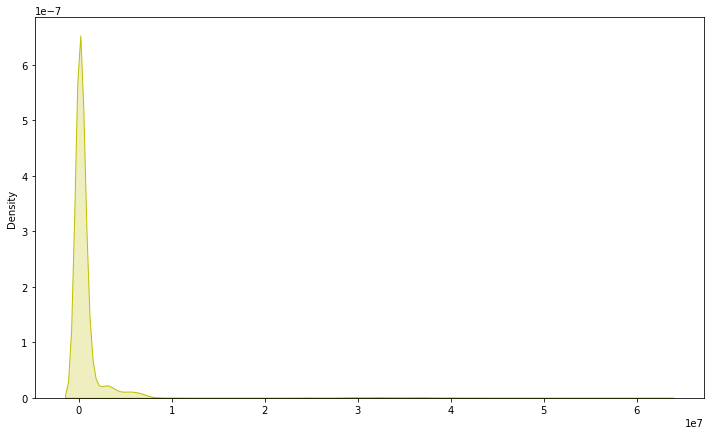

In [181]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"],hist=False,color="y",kde_kws={"shade":True})
plt.show()

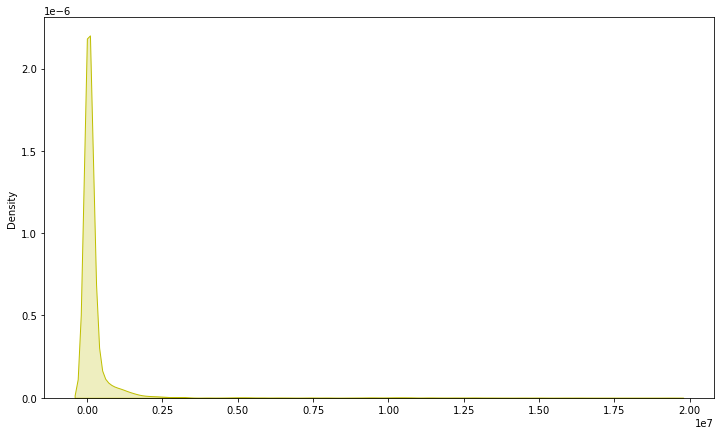

In [182]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"],hist=False,color="y",kde_kws={"shade":True})
plt.show()

In [184]:
df.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

In [193]:
X=df.drop('AveragePrice',axis=1)
Y=df['AveragePrice']

In [198]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head(10)

,Unnamed: 0,Total Volume,Total Bags,type,region,Year,Month,Day
0,-1.565327,-0.227716,-0.234170,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-1.500730,-0.230427,-0.233350,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,-1.436133,-0.212085,-0.234730,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-1.371536,-0.223444,-0.237096,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-1.306939,-0.231538,-0.236718,-0.999836,-1.700252,-1.221282,1.364669,1.519750
5,-1.242342,-0.230107,-0.236211,-0.999836,-1.700252,-1.221282,1.364669,0.722124
6,-1.177746,-0.222152,-0.234554,-0.999836,-1.700252,-1.221282,1.364669,-0.075502
7,-1.113149,-0.214630,-0.236064,-0.999836,-1.700252,-1.221282,1.364669,-0.873129
8,-1.048552,-0.217415,-0.231441,-0.999836,-1.700252,-1.221282,1.364669,-1.670755
9,-0.983955,-0.224791,-0.234242,-0.999836,-1.700252,-1.221282,1.081706,1.063964


In [200]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    r2=r2_score(Y_test,pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.460180304680873 on Random State 113


In [191]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=144)

In [206]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=708)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test,pred,squared=False)
    print("RMSE Score is :",rmse)
    
    r2 = r2_score(Y_test,pred,multioutput='variance_weighted')*100
    print("R2 score is:",r2)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = r2 - cv_score
    print("R2 score - Cross Validation Score is",result)

In [207]:
#Linear Regression()
model=LinearRegression()
reg(model,X,Y)

RMSE Score is : 0.3042850457791813
R2 score is: 43.61854275216044
Cross Validation Score: 5.370009823759605
R2 score - Cross Validation Score is 38.248532928400834


In [208]:
#Ridge Regression.
model=Ridge(alpha=1e-2,normalize=True)
reg(model,X,Y)

RMSE Score is : 0.3043900406050336
R2 score is: 43.5796267246636
Cross Validation Score: 6.601400480693945
R2 score - Cross Validation Score is 36.97822624396965


In [230]:
#Lasso Regression

model=Lasso(alpha=1e-2,normalize=True,max_iter=1e5)
reg(model,X,Y)


TypeError: max_iter must be an instance of int, not float.

In [214]:
#support vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is : 0.2831584962860358
R2 score is: 51.1758970551773
Cross Validation Score: -358.56147349671755
R2 score - Cross Validation Score is 409.73737055189486


In [215]:
#DecisionTreeRegressor


model=DecisionTreeRegressor(criterion="poisson",random_state=111)
reg(model,X,Y)

RMSE Score is : 0.19092075362861624
R2 score is: 77.80366054520258
Cross Validation Score: -23.09642511998519
R2 score - Cross Validation Score is 100.90008566518776


In [216]:
#RandomForestRegressor

model=RandomForestRegressor(max_depth=2,max_features='sqrt')
reg(model,X,Y)

RMSE Score is : 0.3084261499391423
R2 score is: 42.07347670748711
Cross Validation Score: -16.200222048736805
R2 score - Cross Validation Score is 58.273698756223915


In [217]:
#KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')
reg(model,X,Y)

RMSE Score is : 0.32514110458651313
R2 score is: 35.62476438458208
Cross Validation Score: -20.45578567625508
R2 score - Cross Validation Score is 56.080550060837155


In [218]:
#GradientBoostingRegressor

model=GradientBoostingRegressor(loss='quantile',n_estimators=200,max_depth=5)
reg(model,X,Y)

RMSE Score is : 0.284978832920262
R2 score is: 50.546129746413214
Cross Validation Score: -19.199828641211983
R2 score - Cross Validation Score is 69.7459583876252


In [219]:
#AdaBoostRegressor

model=AdaBoostRegressor(n_estimators=300,learning_rate=1.05,random_state=42)
reg(model,X,Y)

RMSE Score is : 0.29588649305146
R2 score is: 46.687952921795095
Cross Validation Score: -32.17607523345934
R2 score - Cross Validation Score is 78.86402815525443


In [220]:
#ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=200,max_features='sqrt',n_jobs=6)
reg(model,X,Y)

RMSE Score is : 0.22263846284026376
R2 score is: 69.81609205679679
Cross Validation Score: 15.132550367793213
R2 score - Cross Validation Score is 54.683541689003576


In [221]:
#XGBRegressor

model=XGBRegressor()
reg(model,X,Y)

RMSE Score is : 0.1305776579553421
R2 score is: 89.61723970589183
Cross Validation Score: 40.5540316259687
R2 score - Cross Validation Score is 49.063208079923136


In [254]:
fmod_param = {'n_estimators':[200,400,600],
              'gamma':[2.0,3.0,4.0],
              'max_depth':[4,6,8],
              'n_jobs':[-2,-1,1]
             }

In [255]:
GSCV = GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [256]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [257]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [258]:
#Here Gridsearchcv provides the best results
GSCV.best_score_

0.7642965442010359

In [259]:
#I have successfully incoprate the hyper parameter on my Regression model and received R2 score.

Saving the best regression ML model

Final_Model = XGBRegressor(gamma=2.0,max_depth=8,n_estimators=200 ,n_jobs=-2)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test,fmod_pred)*100
print("R2 score for the Best Model is:",fmod_r2)

R2 score for the Best Model is: 77.60926055186795


In [247]:
filename = "FinalModelf.pkl"
joblib.dump(Final_Model,filename)

['FinalModelf.pkl']